# Visualisation des données

In [202]:
%reset -f

In [203]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [204]:
%matplotlib nbagg

In [205]:
df_simu = pd.read_csv("../../data/df_simu.csv")

N = df_simu.loc[0, 'N']
M = df_simu.loc[0, 'M']
step_count = df_simu.loc[0, 'step_count']

print("taille du maillage :", (N, M))
print("nombre d'itérations:", step_count)

taille du maillage : (25, 25)
nombre d'iterations: 76


In [206]:
# elements a visualiser
e = np.empty(shape=(step_count, N*M), dtype=float)
f = np.empty(shape=(step_count, N*M), dtype=float)
t = np.empty(shape=(step_count, N*M), dtype=float)
tr = np.empty(shape=(step_count, N*M), dtype=float)

for i in range(step_count):
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E'])
    f[i] = np.sqrt(np.array(df['F_x'])**2 + np.array(df['F_x'])**2)
    t[i] = np.array(df['T'])
    tr[i] = np.array(df['Tr'])
    
x = np.array(df['x'])
y = np.array(df['y'])
rho = np.array(df['rho'])

# au temps final
display(df[:5])

,x,y,rho,E,F_x,F_y,T,Tr
0,0.02,0.02,0.386321,-0.000798,0.000222,3.625410e-10,0,NaN
1,0.02,0.06,0.010000,-0.000817,0.000786,8.428440e-10,0,NaN
2,0.02,0.10,0.010000,-0.000817,0.000786,-5.224600e-14,0,NaN
3,0.02,0.14,0.010000,-0.000817,0.000786,2.399200e-18,0,NaN
4,0.02,0.18,0.010000,-0.000817,0.000786,-8.653620e-23,0,NaN


In [207]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# img = ax.plot_trisurf(x, y, rho, cmap='viridis', edgecolor='none')
# fig.colorbar(img, shrink=0.5, aspect=5)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlim3d([-0.1, 1.1])
# ax.set_title('densité',size="x-large", y=1.)

# ax.view_init(-90, -90);

<IPython.core.display.Javascript object>


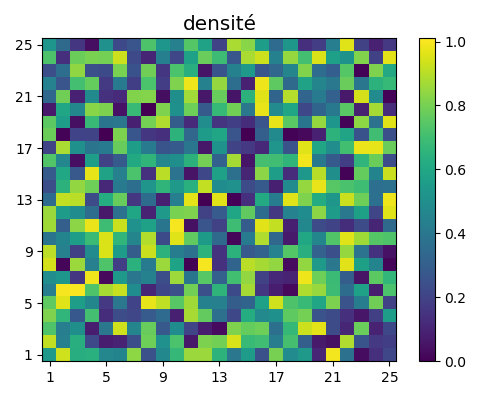

In [213]:
# Plot de densite sous imshow
fig, ax = plt.subplots(1,1,figsize=(5,4))

# pour placer les indices entre 1 et N
def set_ticks(ax):
    ax.set_xticks(np.arange(0, N, 4))
    ax.set_xticklabels(np.arange(1, N+1, 4))
    ax.set_yticks(np.arange(0, M, 4))
    ax.set_yticklabels(np.arange(1, M+1, 4))

rho = np.random.rand(N,M)
img = ax.imshow(rho, origin='lower', cmap="viridis", interpolation='none', aspect='auto', vmin=0, vmax=1.01)
fig.colorbar(img, ax=ax)
set_ticks(ax)
ax.set_title("densité", size="x-large")

plt.tight_layout()

<IPython.core.display.Javascript object>


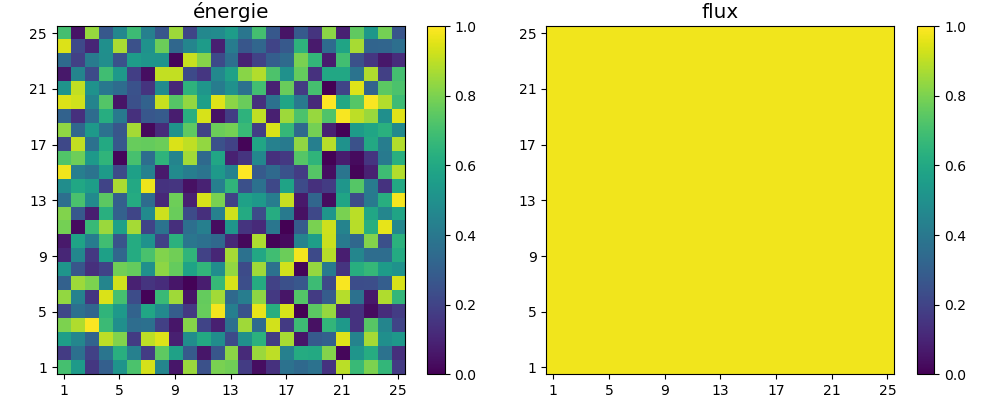

In [209]:
# Plot l'energie et la norme du flux
fps = 10
nSeconds = 5
snapshots = [ np.random.rand(N,M) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(1,2,figsize=(10,4))

img1 = ax[0].imshow(snapshots[0], origin='lower', interpolation='none', vmin=0, vmax=1)
fig.colorbar(img1, ax=ax[0])
set_ticks(ax[0])
ax[0].set_title("énergie", size="x-large")

img2 = ax[1].imshow(snapshots[0]*0, origin='lower', interpolation='none', vmin=0, vmax=1)
fig.colorbar(img2, ax=ax[1])
set_ticks(ax[1])
ax[1].set_title("flux", size="x-large")

plt.tight_layout()
# plt.xticks(np.arange(1, N, 5), fontsize=9)

def animate(i):
    img1.set_array(snapshots[i])    
    img2.set_array(snapshots[i]*0+i*1/50)

    return [img1, img2]

anim = FuncAnimation(fig, animate, frames = nSeconds * fps, repeat=False, interval = 1000/fps)
plt.show()

In [210]:
# anim.save('test.mp4', writer='ffmpeg', fps=fps)